# US Income Inequality across Economic Clusters and Areas


**Principal Investigator: Melisa Demirovic**

**Email: melisa.demirovic@nyu.edu**

This project studies the fluctuation of income inequality over time within the United States by using data from the US Cluster Mapping Website run by the US Economic Development Administration and Harvard Business School. The data on income is available within the time frame between 1998 and 2016 inclusive, and both, in an aggregate form for the US, and in a detailed form across Economic Areas (i.e. states) and Economics Clusters (i.e. sectors or industries) inside the US. The project portrays a tentative conclusion that fluctuations of specific Economic Clusters drive the changes in income inequality in states that deviate from the general US trend.

The project has three sections:

- Data Report and Dataset Formation

- Chart Visualizations of Income Inequality

- Map Visualizations of Annual Wage Growth and Maximum Wages in Dominant Industries


### Data Report

**Overview**: The data behind my project comes from the US Cluster Mapping, mentioned earlier. Their source of this data is the US Census Bureau. As mentioned above, their regional accounts data provides access to measures of economic activity, such as income, at detailed geographic levels (e.g. counties) and at industry level.

**Important Variables**: 

    - Annual Wage is defined as:

"Average payroll divided by total employment in a particular year. Source of Data: U.S. Census Bureau's County Business Patterns.

Average payroll includes all forms of compensation, such as salaries, wages, reported tips, commissions, bonuses, vacation allowances, sick-leave pay, employee contributions to qualified pension plans, and the value of taxable fringe benefits. For corporations, it includes amounts paid to officers and executives; for unincorporated businesses, it does not include profit or other compensation of proprietors or partners. Payroll is reported before deductions for social security, income tax, insurance, union dues, etc." 

    - A Cluster is defined as:

"A regional concentration of related industries that arise out of the various types of linkages or externalities that span across industries in a particular location. Source of Data: U.S. Census Bureau's County Business Patterns."


*Annual Wage* is given per *cluster* in each *State*. All data and variable definitions retrieved from: http://clustermapping.us/

**Access** 

I will use a for loop to download the data directly from the website. Below I demonstrate that I have the ability to access the data.

**Required Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #plotting
import numpy as np #numerical analysis
import geopandas as gpd
from shapely.geometry import Point, Polygon

**Grabbing the Data**

I will create string components for a CSV URL that I will use inside the loop.

In [2]:
start_year = 1998 #the earliest year available on the website
geo_area = "state/" # Economic Area
clusters = "all/" # All available Industries
variable = "private_wage_tf/" # Annual Wage
file_type = "csv" # Take the CSV file

base_url = "http://clustermapping.us/data/report/map/"

Then I will grab the data and clean it inside the loop as well


Note: You may need to run the cell below (with 2 for loops) a couple of times in case a TimeOutError occurs.

In [3]:
df = pd.DataFrame(columns = ["region", "cluster", "wage", "year"]) #create a new dataframe with the wanted columns

for year in range(1998, 2017, 1): # years range from 1998 to 2016 inclusive
    for i in range(1, 52): # there are 51 clusters/industries
        
        url = base_url + geo_area + str(start_year) + "/" + str(year) + "/" + str(i) + "/" + clusters + variable + file_type
        df2 = pd.read_csv(url) #read in a csv file for each industry in each year
        
        #clean the data a bit
        columns = ["Region Type", "Region Code", "Cluster Code", "Subcluster Name", "Subcluster Code"] #columns to be dropped
        df2.drop(columns, axis = 1, inplace = True) #drop unwanted columns defined above
        df2.columns = ["region", "cluster", "wage"]
        
        df2["year"] = year #add a column to mark the year for each industry and economic area
        
        #append
        df = df.append(df2, ignore_index = True) #appends a new dataframe with data on income in one industry in one year
                                                 #and repeats the same with other industries in a given year
                                                 #and then repeats the process for each year

Clean up the dataframe a bit

In [4]:
df.tail()

,region,cluster,wage,year
48385,Washington,Wood Products,47822.740,2016
48386,West Virginia,Wood Products,33791.684,2016
48387,Wisconsin,Wood Products,37653.754,2016
48388,Wyoming,Wood Products,45630.770,2016
48389,NaN,NaN,NaN,2016


In [5]:
df.drop(48389, inplace = True) #drops the last NaN row

The Data is in alphabetical order in "region" and "cluster", and ascending order in "year".

In [6]:
df.head(10)

,region,cluster,wage,year
0,Alabama,Aerospace Vehicles and Defense,38960.418,1998
1,Alaska,Aerospace Vehicles and Defense,0.000,1998
2,Arizona,Aerospace Vehicles and Defense,53690.734,1998
3,Arkansas,Aerospace Vehicles and Defense,0.000,1998
4,California,Aerospace Vehicles and Defense,59229.562,1998
5,Colorado,Aerospace Vehicles and Defense,53564.855,1998
6,Connecticut,Aerospace Vehicles and Defense,53556.816,1998
7,Delaware,Aerospace Vehicles and Defense,0.000,1998
8,Florida,Aerospace Vehicles and Defense,52774.258,1998
9,Georgia,Aerospace Vehicles and Defense,52807.152,1998


In [7]:
df.tail(10)

,region,cluster,wage,year
48379,South Dakota,Wood Products,43909.027,2016
48380,Tennessee,Wood Products,35392.695,2016
48381,Texas,Wood Products,39261.957,2016
48382,Utah,Wood Products,32612.637,2016
48383,Vermont,Wood Products,46188.113,2016
48384,Virginia,Wood Products,39862.004,2016
48385,Washington,Wood Products,47822.740,2016
48386,West Virginia,Wood Products,33791.684,2016
48387,Wisconsin,Wood Products,37653.754,2016
48388,Wyoming,Wood Products,45630.770,2016


N/A values are marked as 0 in this dataset, so I will replace them with NaN.

In [8]:
df["wage"] = df["wage"].replace({float(0):np.nan})

In [9]:
df.head()

,region,cluster,wage,year
0,Alabama,Aerospace Vehicles and Defense,38960.418,1998
1,Alaska,Aerospace Vehicles and Defense,NaN,1998
2,Arizona,Aerospace Vehicles and Defense,53690.734,1998
3,Arkansas,Aerospace Vehicles and Defense,NaN,1998
4,California,Aerospace Vehicles and Defense,59229.562,1998


In [10]:
df.tail()

,region,cluster,wage,year
48384,Virginia,Wood Products,39862.004,2016
48385,Washington,Wood Products,47822.740,2016
48386,West Virginia,Wood Products,33791.684,2016
48387,Wisconsin,Wood Products,37653.754,2016
48388,Wyoming,Wood Products,45630.770,2016


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48389 entries, 0 to 48388
Data columns (total 4 columns):
region     47421 non-null object
cluster    47421 non-null object
wage       37865 non-null float64
year       48389 non-null object
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


# Chart Visualizations

### Average Annual Wage

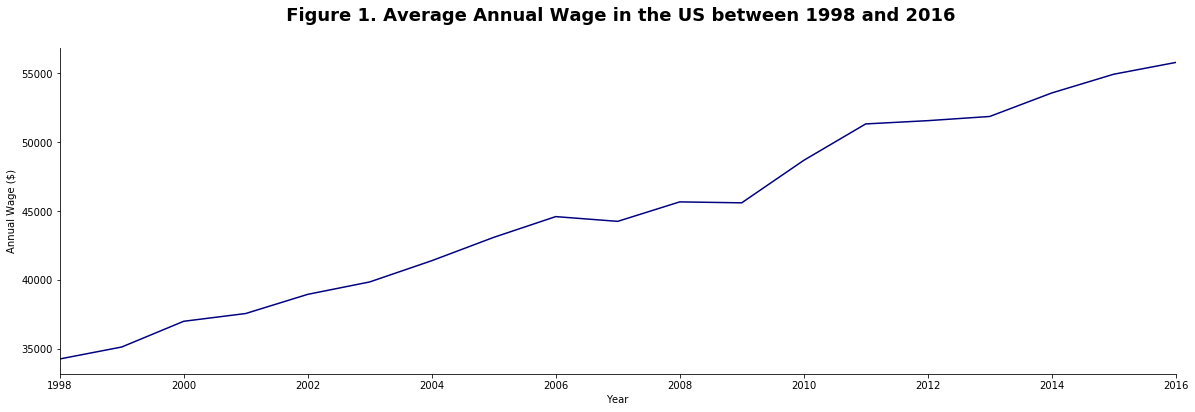

In [561]:
avg = df.groupby("year").wage.mean() 

fig, ax  = plt.subplots()

avg.plot(ax = ax, color = "navy", figsize = (20, 6))

ax.set_title(" Figure 1. Average Annual Wage in the US between 1998 and 2016\n", fontsize = 18, fontweight = "bold")
ax.set_ylabel("Annual Wage ($)")
ax.set_xlabel("Year")

ax.set_xlim(1998, 2016)

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False)

plt.show()

A relatively constant increase in Annual Wage in the US can be observed, with fluctuations between 2006 nad 2012. In order to examine income inequality, the mean of Annual Wage will not suffice. Therefore, the median is used as a proxy to study income inequality.

### US Income Inequality

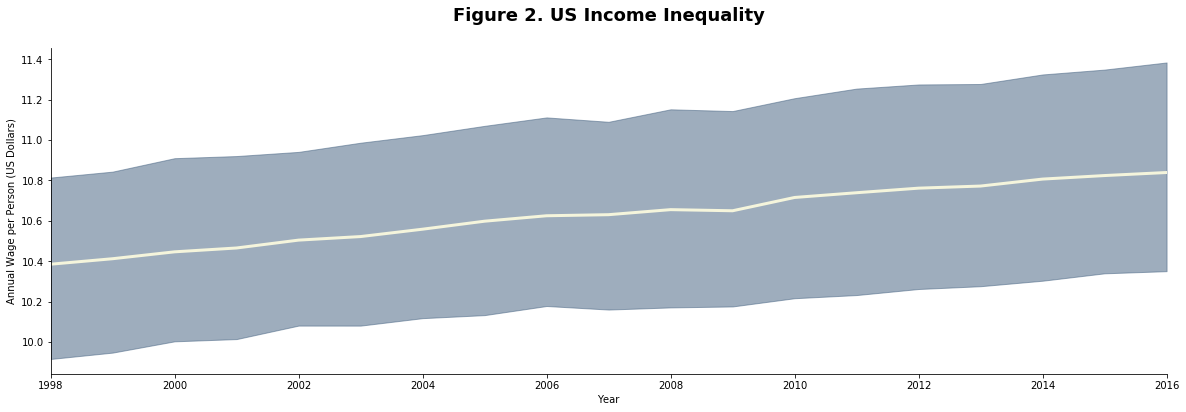

In [560]:
med = np.log(df.groupby("year").wage.median()) 
q90 = np.log(df.groupby("year").wage.quantile(0.90)) # This is going to compute the 90th percentile
q10 = np.log(df.groupby("year").wage.quantile(0.10)) # This is going to compute teh 10th percentile


fig, ax  = plt.subplots()

med.plot(ax = ax, color = "beige", lw = 3, figsize = (20, 6))

ax.fill_between(med.index, q10, q90, color = "#3F5D7D", alpha = 0.5) 

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(1998, 2016)

ax.set_title("Figure 2. US Income Inequality\n", fontsize = 18, fontweight = "bold") 
ax.set_ylabel("Annual Wage per Person (US Dollars)")
ax.set_xlabel("Year")

plt.show()

Figure 2 shows an interval between the top and bottom 10% of wages in the US, and establishes the median as the measure of equality. The farther away from the median line (depicted in white in Figure 2).

Adding the 5 least and most earning states:

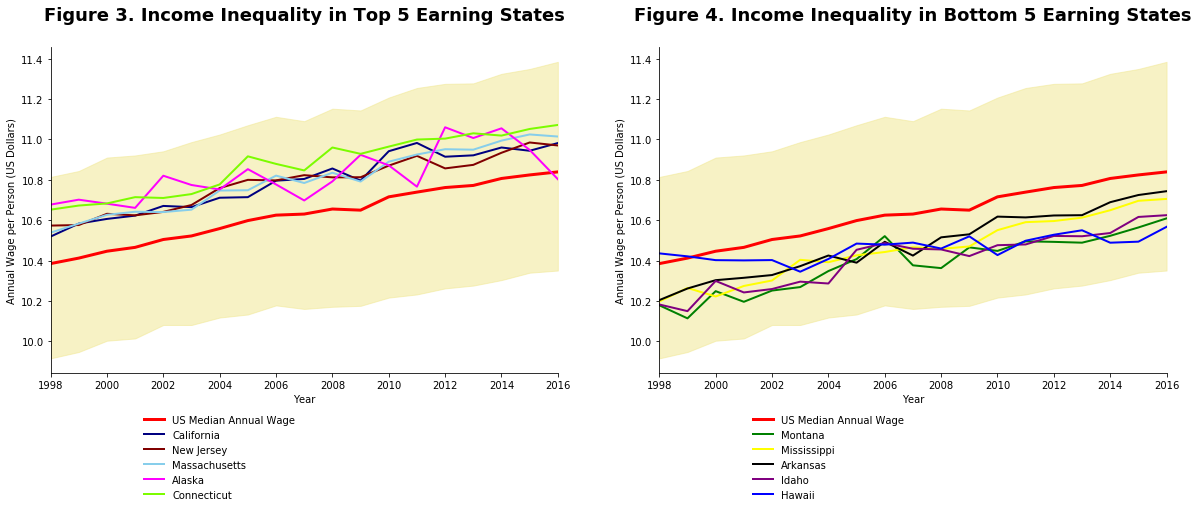

In [574]:
top5 = df.groupby("region").wage.describe().sort_values("50%").tail().index.tolist() #highest median regions
bottom5 = df.groupby("region").wage.describe().sort_values("50%").head().index.tolist() #lowest median regions

med = np.log(df.groupby("year").wage.median()) 
q90 = np.log(df.groupby("year").wage.quantile(0.90)) # This is going to compute the 90th percentile
q10 = np.log(df.groupby("year").wage.quantile(0.10)) # This is going to compute the 10th percentile


fig, ax  = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (20,6))

for i in [0, 1]:
    med.plot(ax = ax[i], color = "red", lw = 3, figsize = (20, 6), label = "US Median Annual Wage")

    ax[i].fill_between(med.index, q10, q90, color = "khaki", alpha = 0.5) 
    
    
#top 5
ax[0].plot(med.index, np.log(df[df["region"] == top5[0]].groupby("year").wage.median()),
           color = 'navy', lw = 2, label = top5[0])
ax[0].plot(med.index, np.log(df[df["region"] == top5[1]].groupby("year").wage.median()),
           color = 'maroon', lw = 2, label = top5[1])
ax[0].plot(med.index, np.log(df[df["region"] == top5[2]].groupby("year").wage.median()),
           color = 'skyblue', lw = 2, label = top5[2])
ax[0].plot(med.index, np.log(df[df["region"] == top5[3]].groupby("year").wage.median()),
           color = 'magenta', lw = 2, label = top5[3])
ax[0].plot(med.index, np.log(df[df["region"] == top5[4]].groupby("year").wage.median()),
           color = 'lawngreen', lw = 2, label = top5[4])

#bottom 5

ax[1].plot(med.index, np.log(df[df["region"] == bottom5[0]].groupby("year").wage.median()),
           color = 'green', lw = 2, label = bottom5[0])
ax[1].plot(med.index, np.log(df[df["region"] == bottom5[1]].groupby("year").wage.median()),
           color = 'yellow', lw = 2, label = bottom5[1])
ax[1].plot(med.index, np.log(df[df["region"] == bottom5[2]].groupby("year").wage.median()),
           color = 'black', lw = 2, label = bottom5[2])
ax[1].plot(med.index, np.log(df[df["region"] == bottom5[3]].groupby("year").wage.median()),
           color = 'purple', lw = 2, label = bottom5[3])
ax[1].plot(med.index, np.log(df[df["region"] == bottom5[4]].groupby("year").wage.median()),
           color = 'blue', lw = 2, label = bottom5[4])


for i in [0, 1]:
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)

    ax[i].set_xlim(1998, 2016)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Annual Wage per Person (US Dollars)")
    ax[i].legend(loc='upper right', bbox_to_anchor=(0.5, -0.1), frameon = False)
    

ax[0].set_title("Figure 3. Income Inequality in Top 5 Earning States\n", fontsize = 18, fontweight = "bold") 
ax[1].set_title("Figure 4. Income Inequality in Bottom 5 Earning States\n", fontsize = 18, fontweight = "bold") 

plt.show()

Figure 3 portrays the fluctuations of income in the 5 most earning states by median income (California, New Jersey, Massachusetts, Alaska, Connecticut). Their median incomes are above the US median income and they are the most fluctuating in Connecticut and Alaska. It is noticeable that the median income of the most earning states has followed the US trend, and the gap between the top 10th percentile and the US median income has grown over time.

Figure 4 portrays the fluctuations of income in the 5 least earning states by median income (Montana, Mississippi, Arkansas, Idaho, Hawaii). Their median incomes are below the US median income and they are the most fluctuating in Hawaii. It is noticeable that the median income of the least earning states has followed the US trend, and has even come closer to the bottom 10th percentile over time.

Considering the role of Clusters:

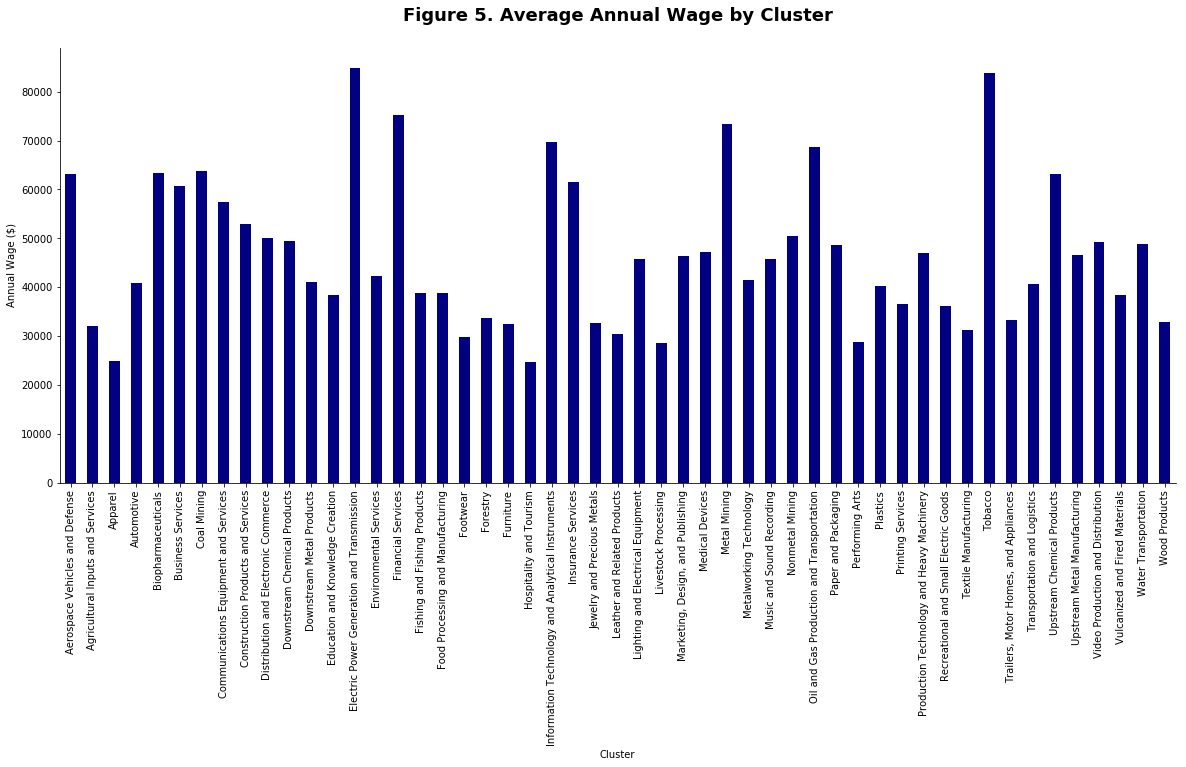

In [557]:
avg = df.groupby("cluster").wage.mean()

fig, ax  = plt.subplots()

avg.plot(ax = ax, color = "navy", figsize = (20, 8), kind='bar')

ax.set_title("Figure 5. Average Annual Wage by Cluster\n", fontsize = 18, fontweight = "bold")
ax.set_ylabel("Annual Wage ($)")
ax.set_xlabel("Cluster")

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False)

plt.show()


Figure 5 is a bar chart that portrays the average wages in each cluster. Most clusters oscillate in the range between 30,000 and 60,000 US Dollars.
Few clusters such as Hospitality and Tourism or Apparel have mean wages below 30,000 US Dollars, while some clusters have mean wages above 70,000$ such as Electric Power Generation or Metal Mining.

Considering the 5 least and most earning clusters:

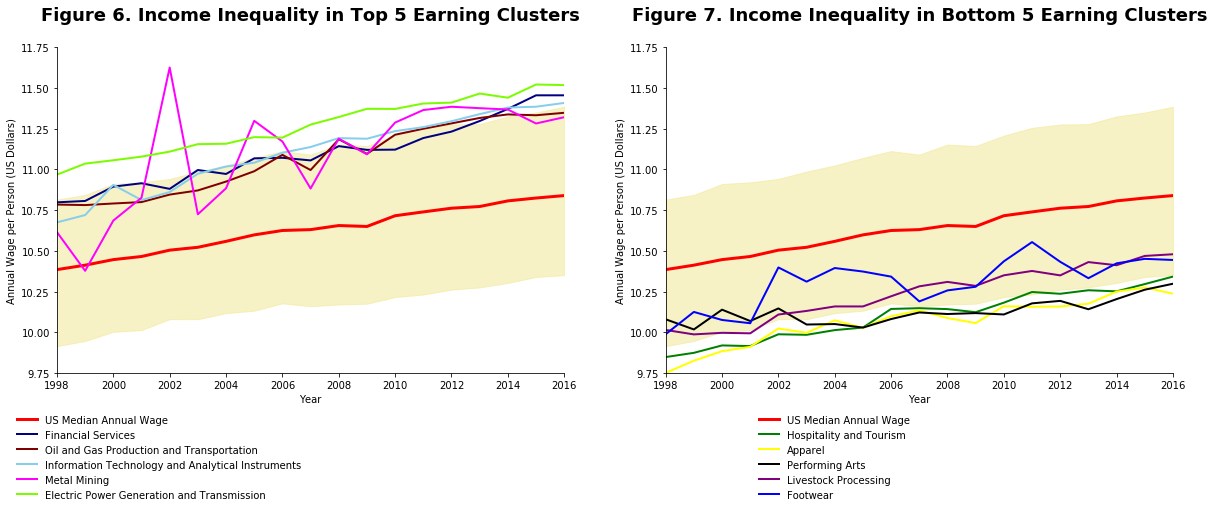

In [575]:
top5 = df.groupby("cluster").wage.describe().sort_values("50%").tail().index.tolist() #highest median clusters
bottom5 = df.groupby("cluster").wage.describe().sort_values("50%").head().index.tolist() #lowest median clusters

med = np.log(df.groupby("year").wage.median()) 
q90 = np.log(df.groupby("year").wage.quantile(0.90)) # This is going to compute the 90th percentile
q10 = np.log(df.groupby("year").wage.quantile(0.10)) # This is going to compute the 10th percentile


fig, ax  = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (20,6))

for i in [0, 1]:
    med.plot(ax = ax[i], color = "red", lw = 3, figsize = (20, 6), label = "US Median Annual Wage")

    ax[i].fill_between(med.index, q10, q90, color = "khaki", alpha = 0.5) 
    
    
#top 5
ax[0].plot(med.index, np.log(df[df["cluster"] == top5[0]].groupby("year").wage.median()),
           color = 'navy', lw = 2, label = top5[0])
ax[0].plot(med.index, np.log(df[df["cluster"] == top5[1]].groupby("year").wage.median()),
           color = 'maroon', lw = 2, label = top5[1])
ax[0].plot(med.index, np.log(df[df["cluster"] == top5[2]].groupby("year").wage.median()),
           color = 'skyblue', lw = 2, label = top5[2])
ax[0].plot(med.index, np.log(df[df["cluster"] == top5[3]].groupby("year").wage.median()),
           color = 'magenta', lw = 2, label = top5[3])
ax[0].plot(med.index, np.log(df[df["cluster"] == top5[4]].groupby("year").wage.median()),
           color = 'lawngreen', lw = 2, label = top5[4])

#bottom 5

ax[1].plot(med.index, np.log(df[df["cluster"] == bottom5[0]].groupby("year").wage.median()),
           color = 'green', lw = 2, label = bottom5[0])
ax[1].plot(med.index, np.log(df[df["cluster"] == bottom5[1]].groupby("year").wage.median()),
           color = 'yellow', lw = 2, label = bottom5[1])
ax[1].plot(med.index, np.log(df[df["cluster"] == bottom5[2]].groupby("year").wage.median()),
           color = 'black', lw = 2, label = bottom5[2])
ax[1].plot(med.index, np.log(df[df["cluster"] == bottom5[3]].groupby("year").wage.median()),
           color = 'purple', lw = 2, label = bottom5[3])
ax[1].plot(med.index, np.log(df[df["cluster"] == bottom5[4]].groupby("year").wage.median()),
           color = 'blue', lw = 2, label = bottom5[4])


for i in [0, 1]:
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)

    ax[i].set_xlim(1998, 2016)
    ax[i].set_ylim(9.75, 11.75)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Annual Wage per Person (US Dollars)")
    ax[i].legend(loc='upper right', bbox_to_anchor=(0.5, -0.1), frameon = False)
    

ax[0].set_title("Figure 6. Income Inequality in Top 5 Earning Clusters\n", fontsize = 18, fontweight = "bold") 
ax[1].set_title("Figure 7. Income Inequality in Bottom 5 Earning Clusters\n", fontsize = 18, fontweight = "bold") 

plt.show()

Figure 6 portrays the fluctuations of median income in the 5 most earning clusters. Their median incomes are above the US median income and they are the most fluctuating in Metal Mining, with peaks far above the top 10th percentile, and a low at the median in late 1990s. It is noticeable that the median income of the 5 most earning clusters has followed the US trend, and that they have been at the top 10th percentile or higher consistently over time.

Figure 7 portrays the fluctuations of income in the 5 least earning clusters by median income. Their median incomes are below the US median income and they are the most fluctuating in Footwear with peaks close the the US median wage. It is noticeable that the median wage of the least earning states has followed the US trend, and has consistently increased over time.

# Map Visualizations

In [20]:
usa = gpd.read_file("C:\\Users\\melis\\data_bootcamp\\project_shapefile\\states.shp")

In [21]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [22]:
b = usa.loc[usa["STATE_NAME"] == "District of Columbia"].index.tolist()

usa = usa.drop(b)

In [23]:
usa.shape

(50, 6)

In [24]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [25]:
usa.columns = ["region", "drawseq", "fips", "sub_region", "abbr", "geometry"]

#### Growth of Income across States

In [119]:
states = df.groupby(["region", "year"]).wage.mean()

In [120]:
states = pd.DataFrame(states)

In [121]:
states.shape

(950, 1)

In [122]:
statelist = []

for i in range(950):
    statelist.append(states.index[i][0])
    
statelist = set(statelist) #unique values

In [212]:
growthdf = pd.DataFrame(columns = ["region", "year", "wage", "growth"])

for state in statelist:
    
    dfst = pd.DataFrame(states.wage.loc[[state, 1998]])

    dfst.reset_index(inplace = True)
    
    dfst["growth"] = np.nan
    
    for i in range(len(dfst) - 1):
        diff = np.log(dfst.wage.iloc[i+1]) - np.log(dfst.wage.iloc[i])
        dfst.growth.iloc[i] = diff
        
    growthdf = growthdf.append(dfst, ignore_index = True)

In [213]:
growthdf.head()

,region,year,wage,growth
0,Alaska,1998,45514.012824,0.072003
1,Alaska,1999,48912.002938,-0.061826
2,Alaska,2000,45979.542714,0.030033
3,Alaska,2001,47381.410714,0.031532
4,Alaska,2002,48899.250857,0.115859


In [200]:
growth = pd.DataFrame(growthdf.groupby("region").growth.mean())

In [248]:
growth["growth_deviation"] = growth.growth - growth.growth.mean() 

In [249]:
growth.tail()

,growth,growth_deviation
region,,
Virginia,0.030961,0.001760
Washington,0.030326,0.001125
West Virginia,0.028585,-0.000616
Wisconsin,0.027685,-0.001516
Wyoming,0.032240,0.003039


In [250]:
combo = pd.merge(usa, growth, on = "region",
                how = "inner")

In [251]:
combo.head()

,region,drawseq,fips,sub_region,abbr,geometry,growth,growth_deviation
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...,0.020046,-0.009155
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...,0.030326,0.001125
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...,0.035023,0.005823
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...,0.028808,-0.000393
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...,0.036099,0.006898


In [252]:
combo[combo["growth"] == combo.growth.max()]

,region,drawseq,fips,sub_region,abbr,geometry,growth,growth_deviation
14,Massachusetts,15,25,New England,MA,(POLYGON ((-71.31932826280908 41.7721953663681...,0.04712,0.017919


In [253]:
combo[combo["growth"] == combo.growth.min()]

,region,drawseq,fips,sub_region,abbr,geometry,growth,growth_deviation
49,Alaska,51,02,Pacific,AK,(POLYGON ((-161.3337853466416 58.7332483821643...,0.015716,-0.013485


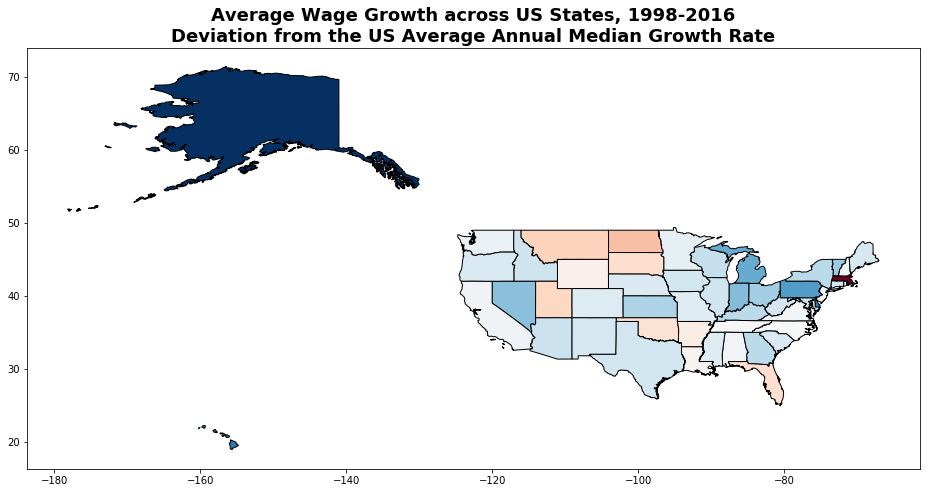

In [562]:
fig, ax = plt.subplots(figsize = (16, 30))

combo.plot(ax = ax, edgecolor = "k",
           column='growth_deviation', cmap='RdBu_r',
           vmin = combo.growth_deviation.min(), vmax = combo.growth_deviation.max())

ax.set_title("Figure 8. Average Wage Growth across US States, 1998-2016\nDeviation from the US Average Annual Median Growth Rate",
             fontsize = 18, fontweight = "bold")

plt.show()

The map of the US is color coded in a way that Dark Blue = largest negative change and Dark Red = largest positive change. As evident on the map, the largest negative change, i.e. a reduction in average annual wage between 1998 and 2016, was recorded in Hawaii, while the largest positive change, i.e. growth was recorded in Massachussets.

Since Massachussets experienced the largest growth in income portayed by being the only state in Figure 8 colored Dark Red, the plan for the following sub-section is to determine whether the highest earning clusters in a given state influenced Figure 8, or whether there was a specific cluster that increased the income of Massachussets while all other states remained unaffected. Figure 9 will give an answer to this question.

#### Dominant Industries' Wages by States

In [466]:
cl = df.groupby(["region", "cluster"]).wage.max()

In [467]:
clusters = pd.DataFrame(cl)

In [468]:
clusters.head()

wage
region  cluster                                   
Alabama Aerospace Vehicles and Defense    69332.95
        Agricultural Inputs and Services  43471.43
        Apparel                           26040.22
        Automotive                        52413.24
        Biopharmaceuticals                77082.28

In [469]:
clusters.shape

(2540, 1)

In [470]:
clusterlist = []

for i in range(2540):
    clusterlist.append(clusters.index[i][1])
    
clusterlist = set(clusterlist)

In [471]:
data = pd.DataFrame()

wagedf = df.set_index("wage")

for area in statelist:
    
    newdf = []
    
    dfcl = pd.DataFrame(clusters.wage.loc[[area, cluster]])

    dfcl.reset_index(inplace = True)
    
    maxw = dfcl.wage.max()
    
    item = wagedf.loc[maxw].cluster

    newdf.append([area, item, maxw])
        
    dff = pd.DataFrame(data = newdf)
    
    data = data.append(dff, ignore_index = True)

data.columns = ["region", "cluster", "maxwage"]

In [472]:
data.head()

,region,cluster,maxwage
0,Alaska,Construction Products and Services,158932.66
1,Vermont,Apparel,127305.88
2,Ohio,Fishing and Fishing Products,104500.00
3,Wyoming,Information Technology and Analytical Instruments,122671.53
4,Illinois,Financial Services,165191.90


In [473]:
usa.head()

,region,drawseq,fips,sub_region,abbr,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [474]:
cl_combo = pd.merge(usa, data, on = "region", how = "inner")

In [482]:
cl_combo.head()

,region,drawseq,fips,sub_region,abbr,geometry,cluster,maxwage
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...,Information Technology and Analytical Instruments,153814.28
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...,Information Technology and Analytical Instruments,233534.72
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...,Fishing and Fishing Products,151000.00
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...,Electric Power Generation and Transmission,97928.20
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...,Information Technology and Analytical Instruments,113890.21


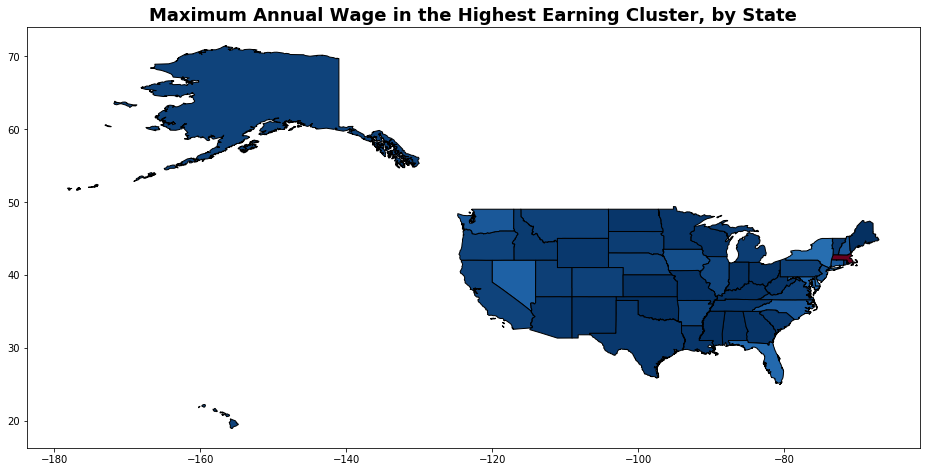

In [568]:
fig, ax = plt.subplots(figsize = (16, 30))

cl_combo.plot(ax = ax, edgecolor = "k", column='maxwage', cmap='RdBu_r',
              vmin = cl_combo.maxwage.min(), vmax = cl_combo.maxwage.max())

ax.set_title("Figure 9. Maximum Annual Wage in the Highest Earning Cluster, by State",  fontsize = 18, fontweight = "bold")

plt.show()

In [573]:
cl_combo[cl_combo.maxwage == cl_combo.maxwage.max()].cluster

14    Tobacco
Name: cluster, dtype: object

Figure 9's color coding is the exact same as in Figure 8.

Tobacco is one of the top earning industries and the average annual wage in that cluster is high. However, in addition, Tobacco has the highest maximum wage among all sectors in Massachussets, making it the highest paying cluster in the state. Moreover, Massachussets earns significantly more from its highest earning industry than other states, which is presented in Figure 9 as the only state marked in Dark Red is Massachussets, meaning that the rest of the states are not making even 50% as much from their own highest earning industries. 

### Conclusion

This project has presented an aspect of income fluctuations and income inequality in the US that involves states as economic areas, economic clusters and time series. Different kinds of visualizations were utilized to portray the relationship between these 3 determinants with wage including line graphs, bar charts, and maps. After evaluating all visualizations presented, it can be deduced that fluctuations of specific economic clusters could potentially drive changes in income inequality in states that deviate from the general US trend.